In [59]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [60]:
from helpers import load_data

# load dataset
x, y = load_data()

In [61]:
print(np.shape(y))
print(int(y.shape[0]/4))

(50,)
12


In [62]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    # perform 4-fold cross- validation for polynomial degree 7
    num_row = y.shape[0] # 50
    interval = int(num_row / k_fold) # 12
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    # 0-12, 12-24, 24-36, 36-48
    return np.array(k_indices)
    # Will two values be wasted here?

In [64]:
"""
test use
"""

k_indices = build_k_indices(y, 4, 1)
#print("k_indices is: ", k_indices)
#print("the shape of k_indices is: ", np.shape(k_indices))
test_idx = k_indices[1]
#print("test set is ", test_idx)
train_idx = []
for i in range(np.shape(k_indices)[0]):
    if i != 1:
        for j in range(np.shape(k_indices)[1]):
            train_idx.append(k_indices[i][j])
# train_idx.flatten()
print("train set is: ", train_idx)
print("the shape for the trian set is: ", np.shape(train_idx))

# x_test = x[test_idx]
# print("x_test is ", x_test)

train_idx_reference = k_indices[~(np.arange(k_indices.shape[0]) == 1)].reshape(-1)
print("train_idx_reference is ", train_idx_reference)
print("the shape for the train_idx_reference is", np.shape(train_idx_reference))

'''
x_train = []
for i in range(len(train_idx)):
    x_train.append(x[train_idx[i]])

print("x_train is ", x_train)
print("x_train's shape is ", np.shape(x_train))
'''

train set is:  [27, 35, 40, 38, 2, 3, 48, 29, 46, 31, 32, 39, 23, 4, 33, 14, 30, 10, 28, 44, 34, 18, 20, 25, 6, 7, 47, 1, 16, 0, 15, 5, 11, 9, 8, 12]
the shape for the trian set is:  (36,)
train_idx_reference is  [27 35 40 38  2  3 48 29 46 31 32 39 23  4 33 14 30 10 28 44 34 18 20 25
  6  7 47  1 16  0 15  5 11  9  8 12]
the shape for the train_idx_reference is (36,)


'\nx_train = []\nfor i in range(len(train_idx)):\n    x_train.append(x[train_idx[i]])\n\nprint("x_train is ", x_train)\nprint("x_train\'s shape is ", np.shape(x_train))\n'

In [81]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    
    
    # training set's indice
    train_idx = []
    for i in range(np.shape(k_indices)[0]):
        if i != k:
            for j in range(np.shape(k_indices)[1]):
                train_idx.append(k_indices[i][j])
    
    # get x & y training set
    x_train = []
    for i in range(np.shape(train_idx)[0]):
        x_train.append(x[train_idx[i]])
        
    y_train = []
    for i in range(np.shape(train_idx)[0]):
        y_train.append(y[train_idx[i]])
        
    # test set's index
    test_idx = k_indices[k]
    
    # get x & y testing set
    x_test = x[test_idx]
    y_test = y[test_idx]
    
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    
    tx_train = build_poly(x_train, degree)
    tx_test = build_poly(x_test, degree)
    
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    
    w_ridge = ridge_regression(y_train, tx_train, lambda_)
    
    # raise NotImplementedError
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    
    loss_tr = np.sqrt(2*compute_mse(y_train, tx_train, w_ridge))
    loss_te = np.sqrt(2*compute_mse(y_test, tx_test, w_ridge))
    
    #raise NotImplementedError
    
    return loss_tr, loss_te

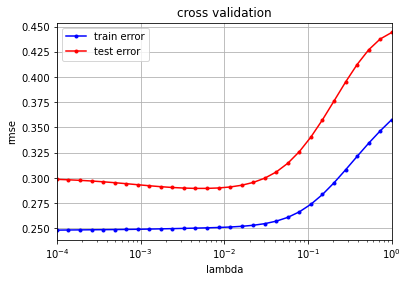

In [83]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************  
    
    for lambda_ in lambdas:
        rmse_tr_k = []
        rmse_te_k = []
        for k in range(k_fold):
            loss_train, loss_test = cross_validation(y, x, k_indices, k, lambda_, degree)
            rmse_tr_k.append(loss_train)
            rmse_te_k.append(loss_test)
        
        rmse_tr.append(np.mean(rmse_tr_k))
        rmse_te.append(np.mean(rmse_te_k))
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [ ]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()